In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [ ]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
date_str = '06'
results = session.query(Measurement.tobs).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()

In [ ]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(results))

In [ ]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns = ['June temps'])

In [ ]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

## D2: Determine the Summary Statistics for December

In [ ]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
date_str = '12'
results = session.query(Measurement.tobs).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()

In [ ]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results))

In [ ]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns = ['December temps'])

In [ ]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

In [ ]:
# Additional queries for written analysis
# Getting descriptive statistics for precipitation in June
date_str = '06'
results = session.query(Measurement.prcp).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()
june_prcp = list(np.ravel(results))
june_prcp_df = pd.DataFrame(june_prcp, columns = ['June Precip.'])
june_prcp_df.describe()

In [ ]:
# Getting descriptive statistics for precipitation in December
date_str = '12'
results = session.query(Measurement.prcp).\
    filter(func.strftime('%m', Measurement.date) == date_str).all()
dec_prcp = list(np.ravel(results))
dec_prcp_df = pd.DataFrame(dec_prcp, columns = ['December Precip.'])
dec_prcp_df.describe()

### For deliverable 3

In [4]:
# Making a for loop to extract precipitation descriptive statistics for every month
# Prelim work, making iterable lists for loops and an index for the eventual dataframe
months = ('01','02','03','04','05','06','07','08','09','10','11','12')
extract_times = (0, 1, 2, 3, 4, 5, 6, 7)
ind = ('count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max')
prcp_stats = {'Values': ind}

for month in months:
    # Code from other deliverables that extracts data from sqlite database
    date_str = month
    results = session.query(Measurement.prcp).\
        filter(func.strftime('%m', Measurement.date) == date_str).all()
    # Turning the raw data into a list, then a dataframe
    prcp = list(np.ravel(results))
    df = pd.DataFrame(prcp)
    # Holding the descriptive statistics in a variable 
    avg_prcp = df.describe()
    # Creating an empty list to hold extracted statistics
    information = []
    # for loop to extract statistics data and add the values to information list
    for time in extract_times:
        item = avg_prcp.iat[time,0]
        information.append(item)
    # Adding this statistics data to the prcp_stats dictionary
    prcp_stats[f'{month}'] = None
    prcp_stats[f'{month}'] = information

In [5]:
prcp_stats_df = pd.DataFrame.from_dict(prcp_stats, orient='columns', dtype=None, columns=None)
prcp_stats_df.style.set_caption("Comparative Precipitation Table, All Months")
prcp_stats_df

,Values,01,02,03,04,05,06,07,08,09,10,11,12
0,count,1620.000000,1466.000000,1566.000000,1595.000000,1624.000000,1574.000000,1569.000000,1492.000000,1379.000000,1445.000000,1368.000000,1405.000000
1,mean,0.129975,0.137271,0.204227,0.150639,0.145677,0.136360,0.167922,0.146662,0.164249,0.155606,0.180380,0.216819
2,std,0.478062,0.398875,0.570625,0.418539,0.369750,0.335731,0.625977,0.409549,0.437928,0.443684,0.505714,0.541399
3,min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.010000,0.010000,0.010000,0.020000,0.020000,0.010000,0.020000,0.010000,0.010000,0.030000
6,75%,0.050000,0.070000,0.120000,0.100000,0.100000,0.120000,0.120000,0.110000,0.150000,0.090000,0.120000,0.150000
7,max,8.810000,5.040000,6.380000,6.250000,4.070000,4.430000,11.530000,4.810000,6.830000,4.470000,8.060000,6.420000


In [6]:
# Creating a bar chart to look at average precipitation rates for each month
prcp_avg_plot = prcp_stats_df
# Have to drop descriptive label column to be able to plot
prcp_avg_plot.drop("Values", axis=1, inplace=True)

<AxesSubplot:>

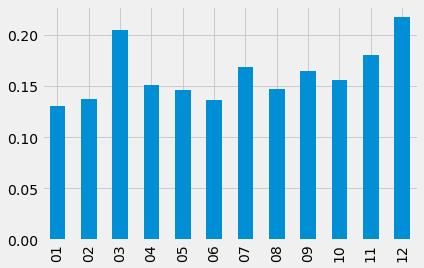

In [7]:
# Pulling just the mean row, and plotting it. It's own column so you can replace the index with any number
# you want to see different plots. The 'Values' column need only be removed once...
row = prcp_avg_plot.iloc[1]
row.plot(kind='bar')

In [12]:
# Now refactoring that code to pull temperature data
# Prelim work, making iterable lists for loops and an index for the eventual dataframe
months = ('01','02','03','04','05','06','07','08','09','10','11','12')
extract_times = (0, 1, 2, 3, 4, 5, 6, 7)
ind = ('count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max')
temp_stats = {'Values': ind}

for month in months:
    # Code from other deliverables that extracts data from sqlite database
    date_str = month
    results = session.query(Measurement.tobs).\
        filter(func.strftime('%m', Measurement.date) == date_str).all()
    # Turning the raw data into a list, then a dataframe
    temps = list(np.ravel(results))
    df = pd.DataFrame(temps)
    # Holding the descriptive statistics in a variable 
    avg_temps = df.describe()
    # Creating an empty list to hold extracted statistics
    information = []
    # for loop to extract statistics data and add the values to information list
    for time in extract_times:
        item = avg_temps.iat[time,0]
        information.append(item)
    # Adding this statistics data to the prcp_stats dictionary
    temp_stats[f'{month}'] = None
    temp_stats[f'{month}'] = information

In [10]:
temp_stats_df = pd.DataFrame.from_dict(temp_stats, orient='columns', dtype=None, columns=None)
temp_stats_df.style.set_caption("Comparative Temperature Table, All Months")
temp_stats_df

,Values,01,02,03,04,05,06,07,08,09,10,11,12
0,count,1727.000000,1610.000000,1693.000000,1713.000000,1733.000000,1700.000000,1711.000000,1622.000000,1480.000000,1556.000000,1488.000000,1517.000000
1,mean,68.726115,69.442236,70.059067,72.357268,73.680900,74.944118,76.082408,76.412454,76.164865,75.391388,73.252688,71.041529
2,std,4.367892,3.981399,3.845271,3.632131,3.355783,3.257417,3.356532,3.453138,3.535178,3.545084,3.617282,3.745920
3,min,54.000000,56.000000,56.000000,53.000000,63.000000,64.000000,61.000000,65.000000,64.000000,64.000000,61.000000,56.000000
4,25%,66.000000,67.000000,68.000000,70.000000,71.000000,73.000000,74.000000,74.000000,74.000000,73.000000,71.000000,69.000000
5,50%,69.000000,70.000000,70.000000,73.000000,74.000000,75.000000,76.000000,76.000000,76.000000,76.000000,74.000000,71.000000
6,75%,72.000000,72.000000,73.000000,75.000000,76.000000,77.000000,78.000000,79.000000,79.000000,78.000000,76.000000,74.000000
7,max,81.000000,83.000000,82.000000,84.000000,87.000000,85.000000,87.000000,87.000000,87.000000,86.000000,83.000000,83.000000


In [13]:
# Creating a bar chart to look at average precipitation rates for each month
temp_avg_plot = temp_stats_df
# Have to drop descriptive label column to be able to plot
temp_avg_plot.drop("Values", axis=1, inplace=True)

<AxesSubplot:>

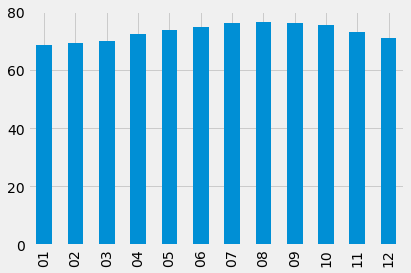

In [14]:
# Pulling just the mean row, and plotting it. It's own column so you can replace the index with any number
# you want to see different plots. The 'Values' column need only be removed once...
row = temp_avg_plot.iloc[1]
row.plot(kind='bar')